In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

LW=load_wine()
df_wine=pd.DataFrame(data=LW.data,columns=LW.feature_names)
df_wine.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0


In [10]:
#Minimize, Definición del criterio de optimización
def minimosCuadrados (w,x,y):
  f=w[0]+w[1]*x #función lineal
  return np.mean((f-y)**2) #promedio de los errores, entre la función y los datos, al cuadrado

w0=np.random.rand(3) #Condición inicial, 2 elementos aleatorios
opt_alchol=minimize(minimosCuadrados, w0, args=(df_wine['alcohol'], df_wine['alcalinity_of_ash']))
print(opt_alchol)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 10.022661300880307
        x: [ 3.609e+01 -1.276e+00]
      nit: 8
      jac: [ 0.000e+00 -2.146e-06]
 hess_inv: [[ 1.279e+02 -9.799e+00]
            [-9.799e+00  7.537e-01]]
     nfev: 33
     njev: 11


Relación entre alcohol y alcalinity_of_ash de la forma:
$$
f=36.1-1.27 alcohol
$$
con error cuadratico medio de 10.227

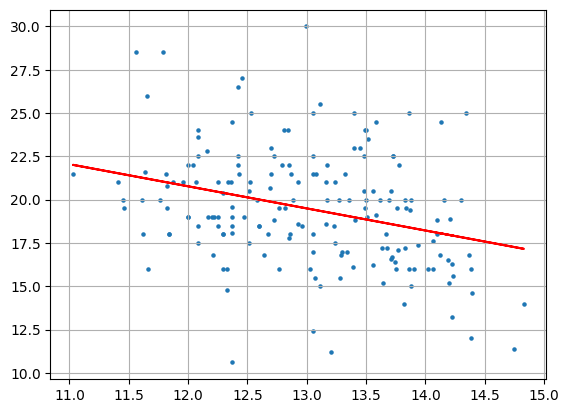

In [12]:
plt.scatter(df_wine['alcohol'], df_wine['alcalinity_of_ash'], s=5) #Dtaos
f=opt_alchol.x[0]+opt_alchol.x[1]*df_wine['alcohol']
plt.plot(df_wine['alcohol'], f, 'r')
plt.grid()

In [15]:

w0=np.random.rand(2) #Condición inicial, 2 elementos aleatorios
opt_alchol=minimize(minimosCuadrados, w0, args=(df_wine['ash'], df_wine['alcalinity_of_ash']))
print(opt_alchol)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.91001381191545
        x: [ 6.723e+00  5.397e+00]
      nit: 7
      jac: [ 2.384e-07 -1.192e-07]
 hess_inv: [[ 3.792e+01 -1.581e+01]
            [-1.581e+01  6.681e+00]]
     nfev: 27
     njev: 9


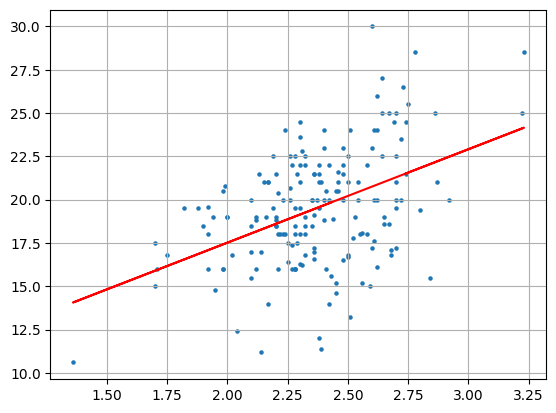

In [16]:
plt.scatter(df_wine['ash'], df_wine['alcalinity_of_ash'], s=5) #Dtaos
f=opt_alchol.x[0]+opt_alchol.x[1]*df_wine['ash']                #Función encontrada
plt.plot(df_wine['ash'], f, 'r')                                #grafica
plt.grid()

Relación entre ash y alcalinity_of_ash de la forma:
$$
f=6.72+5.39 ash
$$
con error cuadratico medio de 8.9

In [27]:
from sklearn.linear_model import LinearRegression
regressor_alcohol=LinearRegression()
regressor_alcohol.fit(df_wine[['alcohol']], df_wine['alcalinity_of_ash'])
regressor_alcohol.coef_
regressor_alcohol.intercept_

36.08628435556851

In [28]:
#Si R^2 >= 0.8 descartamos una variable
regressor_alcohol.score(df_wine[['alcohol']], df_wine['alcalinity_of_ash'])

0.09624584016183024

# Relación entre las variables ash y alcohol con alcalinity_of_ash

In [30]:
regressor=LinearRegression()
regressor.fit(df_wine[['alcohol', 'ash']], df_wine['alcalinity_of_ash'])
print(regressor.coef_)
print(regressor.intercept_)
print(regressor.score(df_wine[['alcohol', 'ash']], df_wine['alcalinity_of_ash']))

[-1.73988451  6.48622306]
26.764761443091977
0.36745963729790754


In [10]:
#Minimize, Definición del criterio de optimización
def minimosCuad (w,x,z,y):
  f=w[0]+w[1]*x+w[2]*z #función lineal
  return np.mean((f-y)**2) #promedio de los errores, entre la función y los datos, al cuadrado
w0=np.random.rand(3) #Condición inicial, 3 elementos aleatorios
opt_alchol=minimize(minimosCuad, w0, args=(df_wine['alcohol'], df_wine['ash'],  df_wine['alcalinity_of_ash']))
print(opt_alchol)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 7.014891987479045
        x: [ 2.676e+01 -1.740e+00  6.486e+00]
      nit: 19
      jac: [ 0.000e+00 -1.788e-07  0.000e+00]
 hess_inv: [[ 1.412e+02 -9.012e+00 -9.966e+00]
            [-9.012e+00  7.713e-01 -4.310e-01]
            [-9.966e+00 -4.310e-01  6.589e+00]]
     nfev: 80
     njev: 20


In [6]:
def minimosCuad(w, x, z, y):
    f = w[0] + w[1] * x + w[2] * z
    error = np.mean((f - y)**2)
    #print(f'Parámetros: {w}, Error: {error}')
    return error
w0=np.random.rand(3) #Condición inicial, 3 elementos aleatorios
bounds = [(None, None), (None, None), (None, None)]  # Límites para los parámetros w
opt = minimize(minimosCuad, w0, args=(df_wine['alcohol'], df_wine['ash'], df_wine['alcalinity_of_ash']), bounds=bounds)
print(opt)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 7.014891987477499
        x: [ 2.676e+01 -1.740e+00  6.486e+00]
      nit: 18
      jac: [-5.364e-07 -5.245e-06 -1.013e-06]
 hess_inv: [[ 1.417e+02 -9.027e+00 -1.013e+01]
            [-9.027e+00  7.622e-01 -3.690e-01]
            [-1.013e+01 -3.690e-01  6.303e+00]]
     nfev: 76
     njev: 19


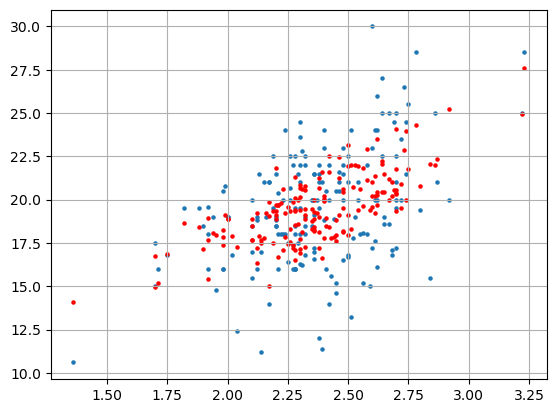

In [31]:
plt.scatter(df_wine['ash'], df_wine['alcalinity_of_ash'], s=5) #Dtaos
f=opt.x[0]+opt.x[1]*df_wine['alcohol']+opt.x[2]*df_wine['ash']        #Función encontrada
plt.scatter(df_wine['ash'], f, c='r', s=5)                                #grafica
plt.grid()

MEDIDAS DE DISPERCION 


Media Aritmetica 

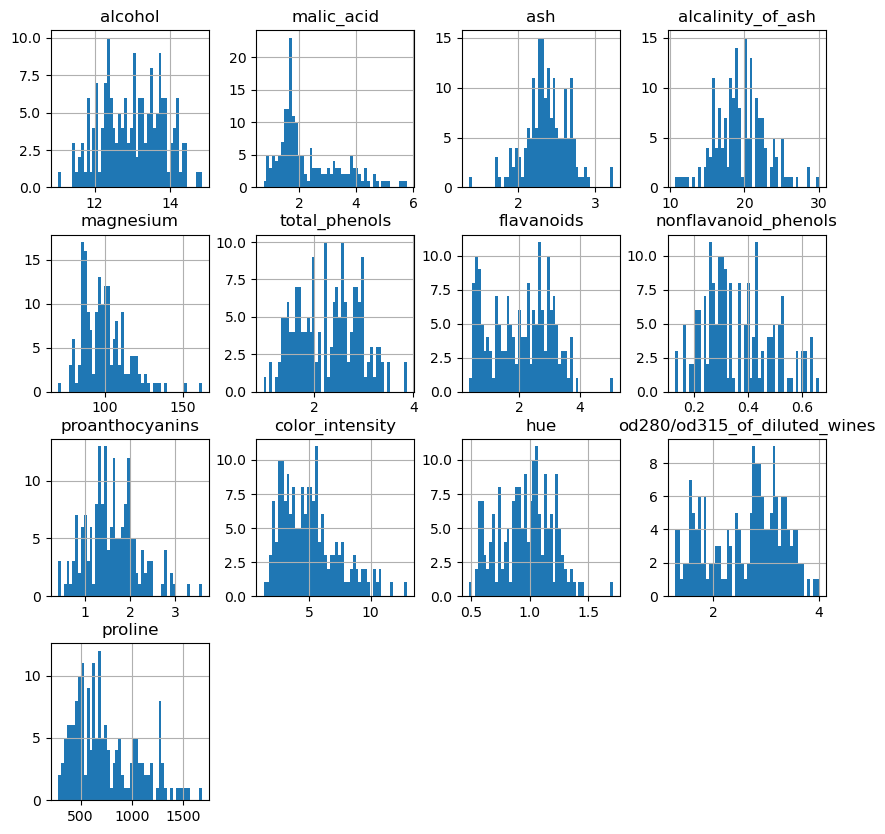

In [32]:
h = df_wine.hist(figsize=(10,10), bins=50)


In [33]:
np.mean(df_wine['alcohol'])

13.00061797752809

In [34]:
np.mean(df_wine, axis=0)

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [36]:
df_wine['alcohol'].mean()

13.00061797752809

(array([ 1.,  0.,  4.,  6.,  8., 11., 14., 17., 10., 11., 15., 12., 12.,
        13., 18.,  7., 11.,  6.,  0.,  2.]),
 array([11.03, 11.22, 11.41, 11.6 , 11.79, 11.98, 12.17, 12.36, 12.55,
        12.74, 12.93, 13.12, 13.31, 13.5 , 13.69, 13.88, 14.07, 14.26,
        14.45, 14.64, 14.83]),
 <BarContainer object of 20 artists>)

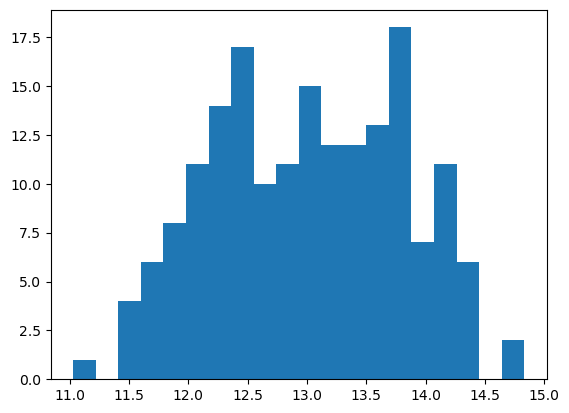

In [4]:
plt.hist(df_wine['alcohol'], bins=20)#desde matplotlib, la función hist() nos regresa el número 